# REINFORCEMENT LEARNING: THOMSON SAMPLING
### CLICK THROUGH RATE OPTIMIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


### Which Version of the 10Ads will have the highest CTR
##### If a user clicks on Ad, reward=1 & Vice Versa
#### Which version of Ad to show to user in next round, depending on previous observations

In [3]:
dataset.shape
# Ad placed for 10,000 users on the social Network

(10000, 10)

## Implementing Random Selection of 10 Ads

In [4]:
import random
N=10000
d=10
ads_selected=[]
total_reward=0
for n in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=dataset.values[n,ad]
    total_reward=total_reward+reward

In [5]:
total_reward #Random selection of Ad at each round

1275

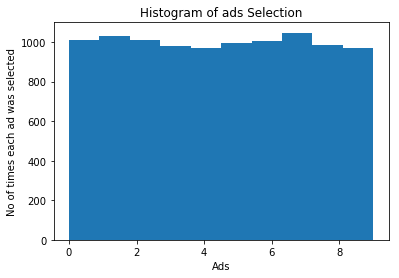

In [6]:
plt.hist(ads_selected)
plt.title('Histogram of ads Selection')
plt.xlabel('Ads')
plt.ylabel('No of times each ad was selected')
plt.show()

## Implementing Thomson Sampling

In [7]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

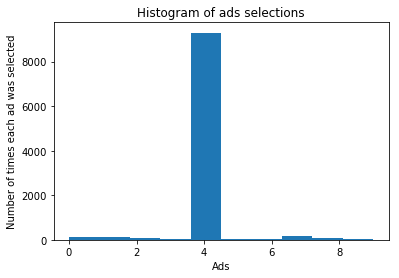

In [8]:
# Visualising the results
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [9]:
total_reward

2604

#### Ad Index 04 has highest CRT